In [64]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

plt.rc('font', family="Cambria")

#! 根据模型修改
# ppi, ppi-woppm
model_name = "ppi-woppm"

In [65]:
results_dir = f"./results/{model_name}"
values = defaultdict(list)
errors = defaultdict(list)
for c in [3, 8]:
    for fn in ['emb'] + list(range(9)):
        lines = open(os.path.join(results_dir, f"{str(fn)}-{c}"+".eval"), "r").readlines()
        for line in lines:
            avg, stdev, _min, _max = line.strip().split()
            values[c].append(float(avg))
            errors[c].append(float(stdev))

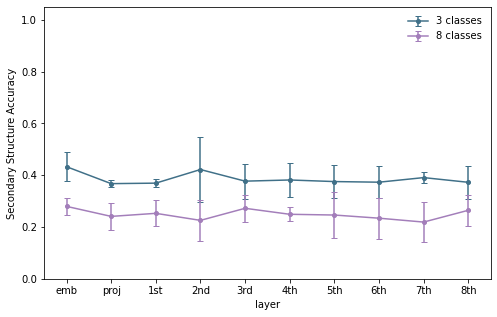

In [66]:
# fig, subs = plt.subplots(1, 2, figsize=(10, 5))
plt.figure(figsize=(8, 5))
fig = plt.subplot()

xs = list(range(1, 11))
xticks = ["emb", "proj", "1st", "2nd", "3rd", "4th", "5th", "6th", "7th", "8th"]
colors = ["#407088", "#a37eba"]

width=0.5

fig.set_xlim(0.5, 10.5, 1)
fig.set_ylim(0, 1.05)
fig.set_xlabel("layer")
fig.set_ylabel("Secondary Structure Accuracy")
fig.set_xticks(range(1, 11), xticks)

bar3 = fig.errorbar(xs, values[3], yerr=errors[3], label="3 classes", color=colors[0], capsize=3, marker="o", ms=4)
bar8 = fig.errorbar(xs, values[8],  yerr=errors[8], label="8 classes", color=colors[1], capsize=3, marker="o", ms=4)

fig.legend(frameon=False)
# fig.legend(frameon=False)
# subs[idx].errorbar(xs, values[c], yerr=errors[c], label=f"{c}-class", capsize=3, marker="o", ms=4)
    

plt.savefig(f"./figure-{model_name}.pdf", bbox_inches='tight')